In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

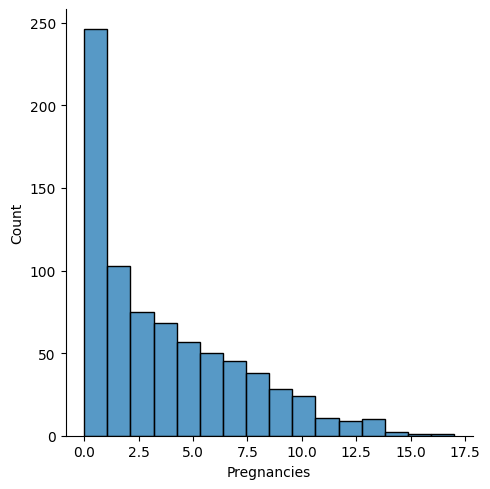

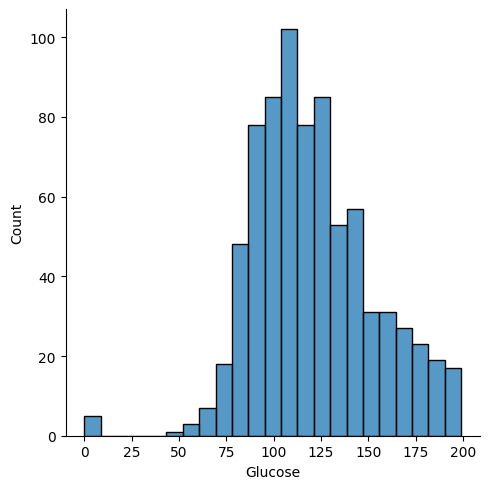

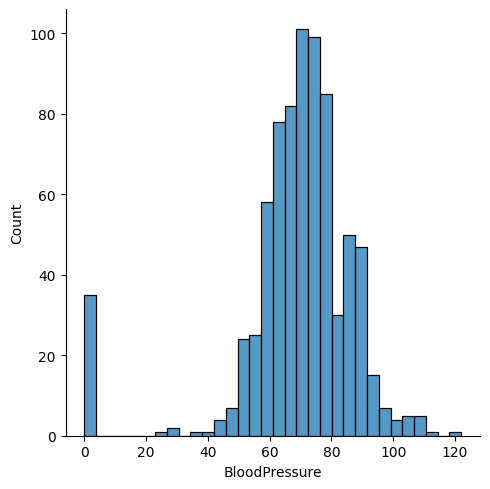

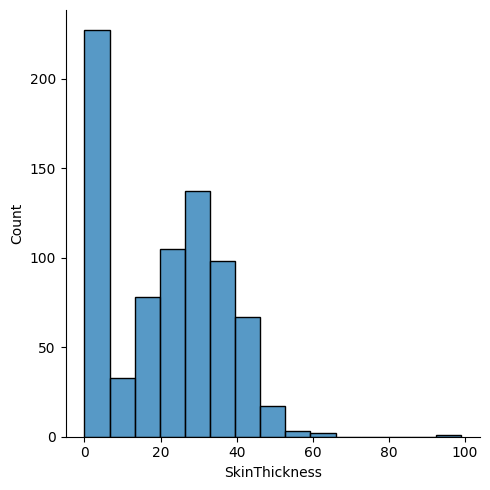

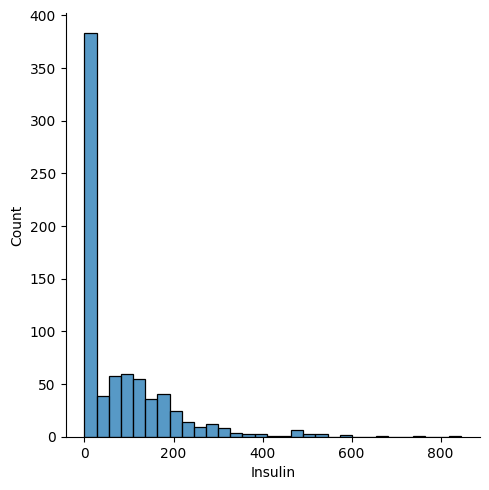

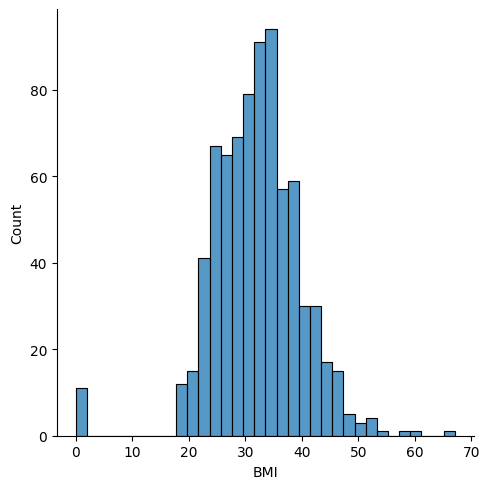

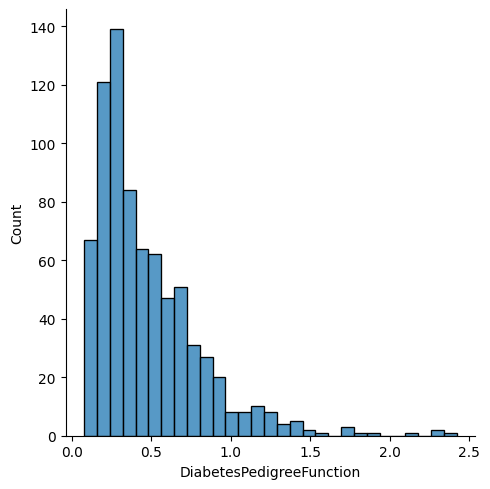

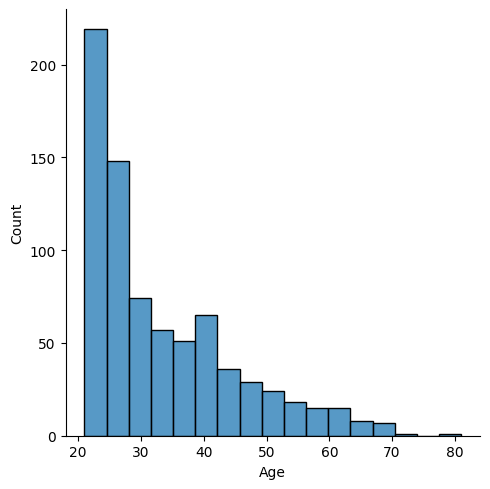

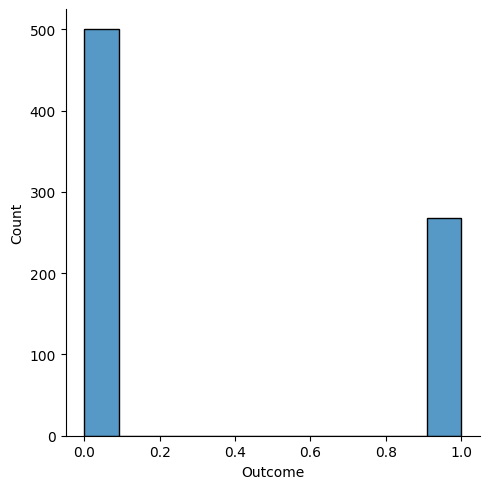

In [13]:
for col in df_columns:
    sns.displot(df[col])
plt.show()

In [14]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [15]:
from  sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmean = KMeans(n_clusters=i, init='k-means++')
    kmean.fit(x)
    wcss.append(kmean.inertia_)

/opt/homebrew/Caskroom/miniforge/base/envs/ml-training/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml-training/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml-training/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml-training/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

In [20]:
from kneed import KneeLocator
locator = KneeLocator(range(1,10),wcss, curve= 'convex', direction = 'decreasing' )

In [21]:
locator.knee

3

In [24]:
kmin = KMeans(n_clusters = 3, init='k-means++')


In [25]:
df['clus'] = kmin.fit_predict(x,y)

/opt/homebrew/Caskroom/miniforge/base/envs/ml-training/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
df['clus'].value_counts()

0    495
1    235
2     38
Name: clus, dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [34]:
models = {
    'log':LogisticRegression(),
    'rf':RandomForestClassifier(),
    'svm':SVC()
}

In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [41]:
def eval(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)
    return acc, roc

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y)

In [43]:
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc, roc = eval(y_test,y_pred)
    model_name = list(models.keys())[i]
    print(model_name)
    print(acc)
    print(roc)
    print('='*50)

log
0.8125
0.7784629981024667
rf
0.7552083333333334
0.7307874762808348
svm
0.7760416666666666
0.7137096774193549


/opt/homebrew/Caskroom/miniforge/base/envs/ml-training/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
data_0 = df[df['clus']==0]
data_1 = df[df['clus']==1]
data_2 = df[df['clus']==2]

In [50]:
data_0_x= data_0.drop(['Outcome','clus'], axis=1)
data_1_x= data_0.drop(['Outcome','clus'], axis=1)
data_2_x= data_0.drop(['Outcome','clus'], axis=1)

In [51]:
data_0_y=data_0['Outcome']
data_1_y=data_0['Outcome']
data_2_y=data_0['Outcome']

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(data_0_x,data_0_y)

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc, roc = eval(y_test,y_pred)
    model_name = list(models.keys())[i]
    print(model_name)
    print(acc)
    print(roc)
    print('='*50)

log
0.7903225806451613
0.7208333333333332
rf
0.7580645161290323
0.6773809523809524
svm
0.7903225806451613
0.688095238095238


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(data_1_x,data_1_y)

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc, roc = eval(y_test,y_pred)
    model_name = list(models.keys())[i]
    print(model_name)
    print(acc)
    print(roc)
    print('='*50)

log
0.8064516129032258
0.7136197136197137
rf
0.782258064516129
0.7067932067932068
svm
0.7903225806451613
0.6640026640026641


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(data_2_x,data_2_y)

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc, roc = eval(y_test,y_pred)
    model_name = list(models.keys())[i]
    print(model_name)
    print(acc)
    print(roc)
    print('='*50)

log
0.8225806451612904
0.7766217870257038
rf
0.75
0.7096083231334149
svm
0.8145161290322581
0.7414320685434518


## so the conlcusion is we will proceed without making clusters, because we are getting better accuracy with single model
